# Vino Verde

1. Import usual libraries

In [24]:
import pandas as pd
import plotly.express as px
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import  StandardScaler # OneHotEncoder,, LabelEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import (
#     accuracy_score,
#     # f1_score,
#     ConfusionMatrixDisplay,
#     RocCurveDisplay,
#     # classification_report
# )
import matplotlib.pyplot as plt





# import numpy as np
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression

# import plotly.graph_objects as go
# import plotly.io as pio


2. Download the dataset from the following url: `"https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/winequality-red.csv"`

You'll find a description of the variables [here](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) where you'll find a description of the variables. Display the first few lines of the dataset.

In [13]:
df = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2.bis Transform all variable names so that all spaces are replaced with "_".

In [10]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df.columns = df.columns.str.replace(" ", "_")
df.head()  

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3. Use a command to get the variable type of each variable in the dataset as well as potential number of missing values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Plot the distributions of each of the explanatory variables against the target variable and analyse what you see. Which features seem important to estimate the wine quality?

In [25]:
fig = px.histogram(df, "fixed_acidity", color="quality", histnorm="probability", width=800, height=400)
fig.show()

In [29]:
features_list = df.columns[:-1]
features_list
for f in features_list:
    fig = px.histogram(df, f, color="quality", histnorm="probability", width=800, height=400)
    fig.show()  


In [44]:
features_list = df.columns[:-1]


for f in features_list:
    fig = px.histogram(df, f, color="quality", facet_row="quality", histnorm="probability", width=800, height=400)
    fig.show()

In [43]:
features_list = df.columns[:-1]


for f in features_list:
    fig = px.histogram(df, f, color="quality", facet_row="quality", histnorm="probability", width=800, height=400, category_orders=dict(quality=[3, 4, 5, 6, 7, 8]))
    fig.show()

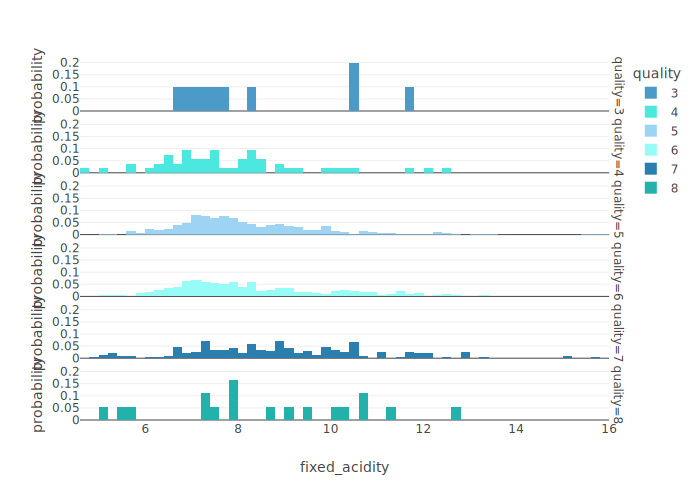

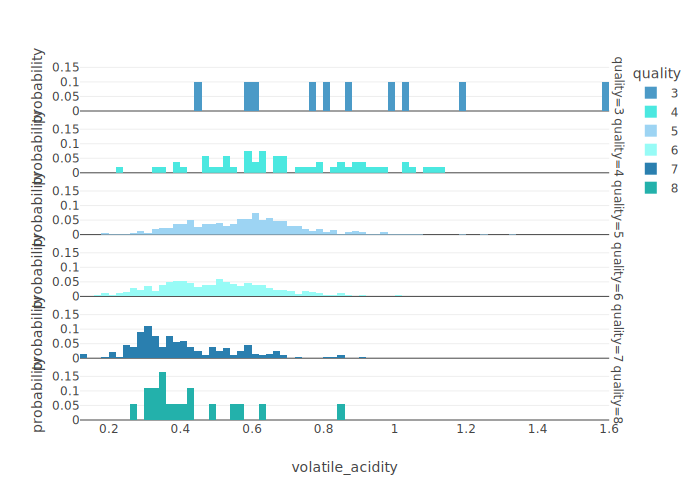

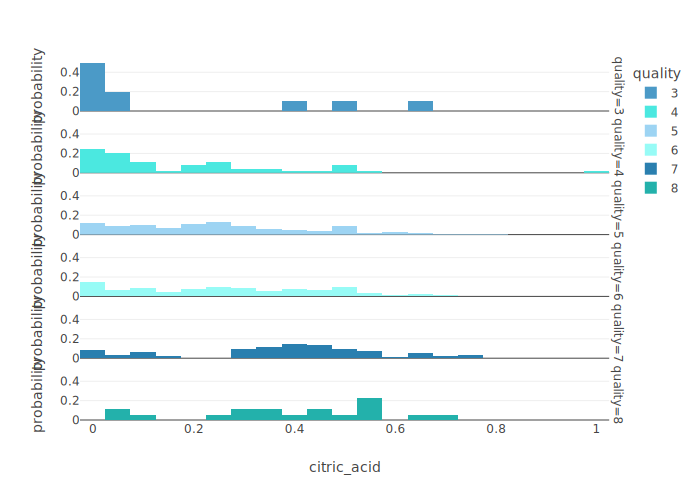

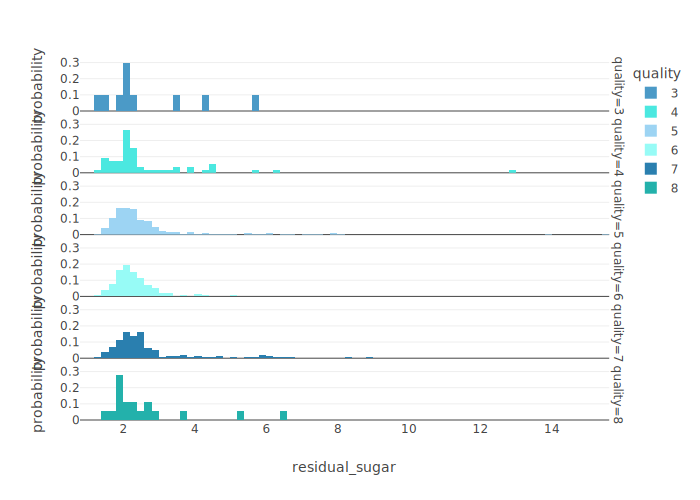

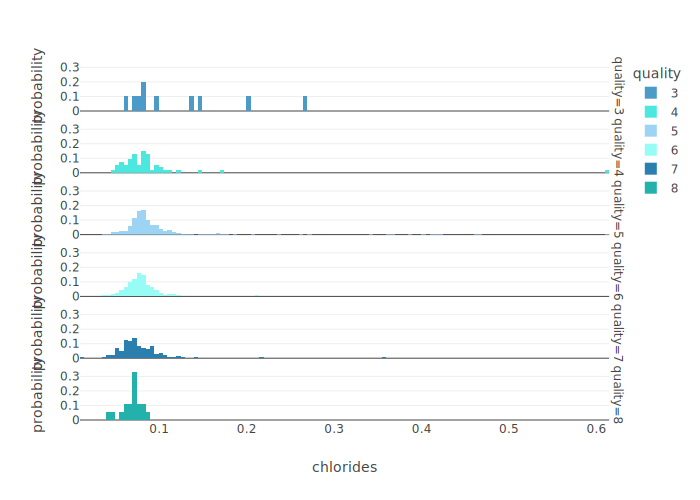

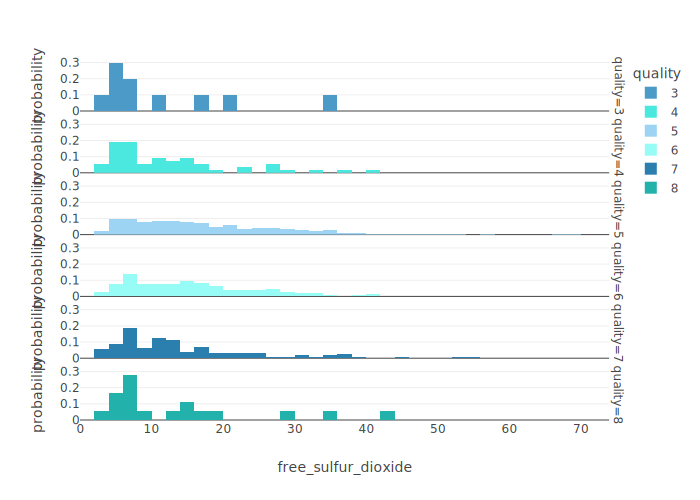

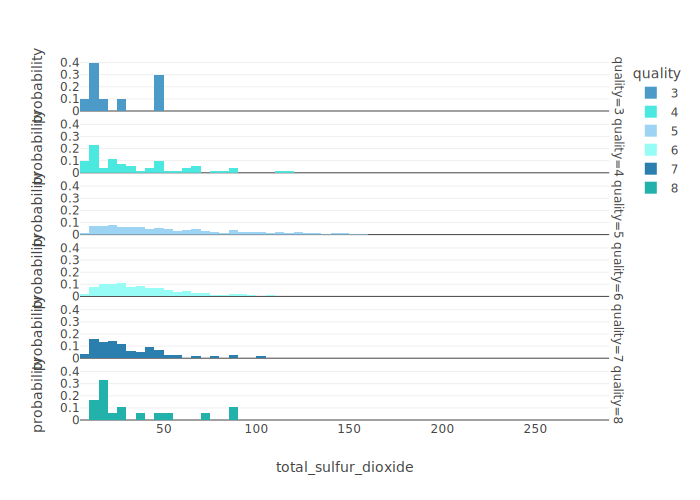

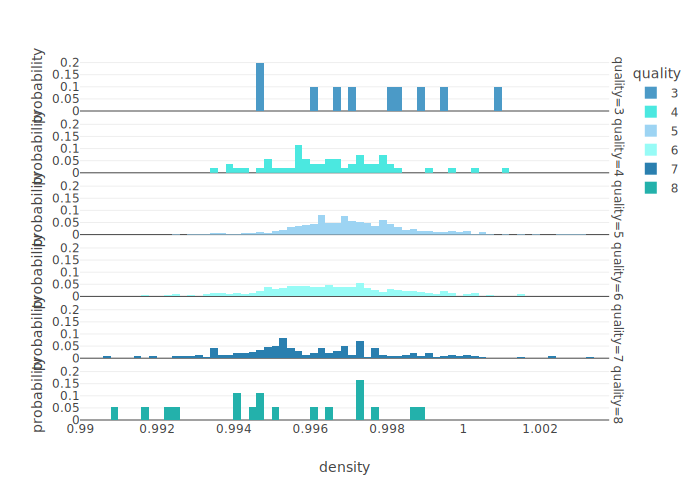

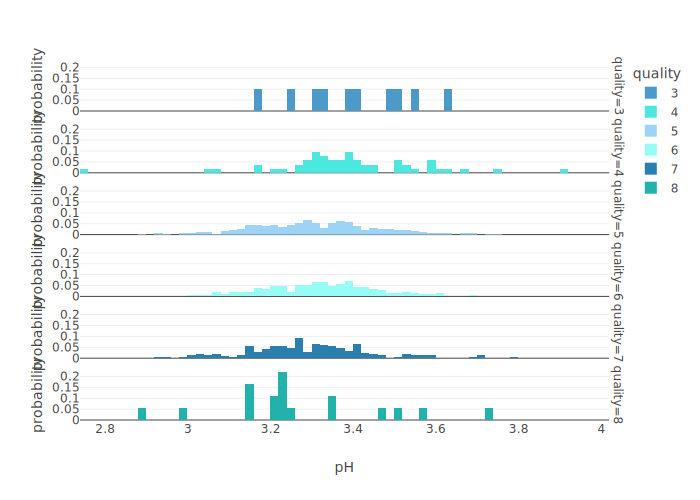

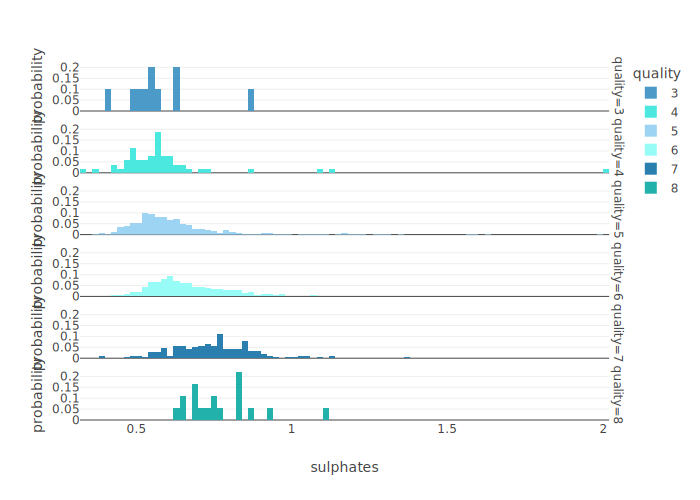

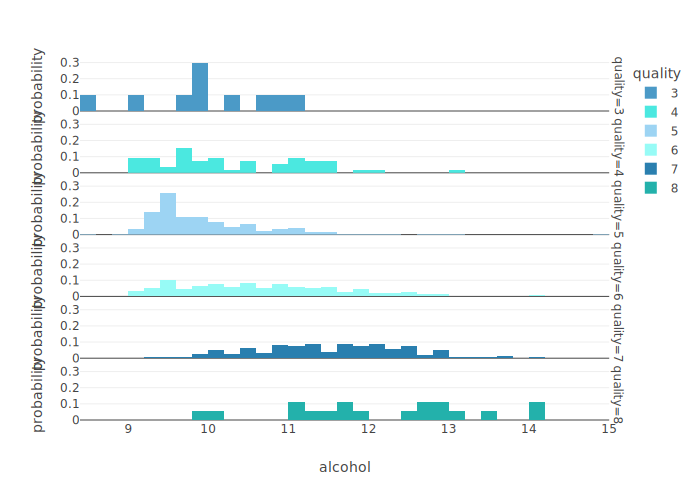

5. Is the target variable uniformely distributed across all possible values? Is it possible to use logistic regression to predict the values of quality? How?

In [35]:
# df.groupby(["quality"]).count()
df["quality"].value_counts()


# C'est pas bien distribué

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

6. Create a baseline model (univariate logistic regression). Take one feature that seems to be a good predictor for the wine quality. What's the model accuracy on train/test sets?

Hint: if some preprocessings are necessary, apply it to X_train/X_test

In [17]:
# C'est pas bi varié
# On va calculer la proba d'avoir 

Separating labels from features...
...Done.

Y : 
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

X :
   alcohol
0      9.4
1      9.8
2      9.8
3      9.8
4      9.4


Dividing into train and test sets...
...Done.



Preprocessing X_train...
      alcohol
642       9.4
679       9.6
473      10.6
390      12.9
1096     10.8

...Done!
[[-0.95579434]
 [-0.76727388]
 [ 0.17532846]
 [ 2.34331382]
 [ 0.36384892]]

Preprocessing X_test...
      alcohol
1109     10.8
1032      9.6
1002     11.7
487      10.0
979      10.4

...Done!
[[ 0.36384892]
 [-0.76727388]
 [ 1.21219102]
 [-0.39023294]
 [-0.01319201]]



Train model...
...Done.


accuracy score on training set :  0.5465207193119624
accuracy score on test set :  0.578125


7. Use cross-validation with cv=10 to get a better feel of the model's average performance on this dataset.

10-fold cross-validation...


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.



The cross-validated accuracy is :  0.5410617618110236
The standard deviation is :  0.027051325500817094


8. What would be the test accuracy for a "dummy" model that would always predict the most frequent class? Is the baseline model interesting?

dummy accuracy on test set :  0.421875


9. Train a multivariate model by including all the features and compute its accuracy on train/test.

Hint1: Do the explanatory variables need imputation, encoding or normalization? If so proceed to the necessary transformations. Why is normalization important when using logistic regression?

Hint2: If you get a "convergence warning" while training the model, you might want to increase the value of the argument "max_iter" in the LogisticRegression 🤓

Number of rows : 1599

Display of dataset: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Basics statistics: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Percentage of missing values: 


fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Separating labels from features...
...Done.

Y : 
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

X :
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.

Dividing into train and test sets...
...Done.



Performing preprocessings on train set...
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
812            10.8              0.45         0.33             2.5      0.099   
1249            7.1              0.60         0.01             2.3      0.079   
1421            7.5              0.40         0.18             1.6      0.079   
157             7.1              0.43         0.42             5.5      0.071   
377             9.4              0.27         0.53             2.4      0.074   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
812                  20.0                  38.0  0.99818  3.24       0.71   
1249                 24.0                  37.0  0.99514  3.40       0.61   
1421                 24.0                  58.0  0.99650  3.34       0.58   
157                  28.0                 128.0  0.99730  3.42       0.71   
377                   6.0                  18.0  0.99620  3.20       1.13   

      al

Train model...
...Done.


accuracy score on training set :  0.6004691164972635
accuracy score on test set :  0.61875


10. Is this model significantly better than the baseline?

10-fold cross-validation...


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 8 members, which is less than n_splits=10.



The cross-validated accuracy is :  0.5910986712598425
The standard deviation is :  0.05437570023889957


11. Extract the model's predictions on train/test sets. Use these values to plot the confusion matrices.

Predictions on training set...
...Done.
[6 6 5 5 7]

Predictions on test set...
...Done.
[6 6 5 6 6]



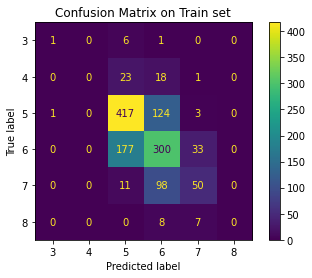

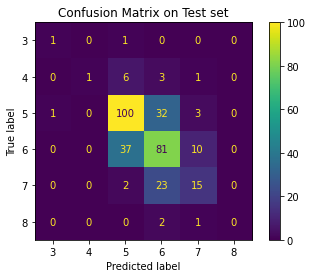

12. Analyze the model's coefficients. Can you deduce easily what are the most important features to predict the wine quality?

Coefficients of the Logistic regression model:


array([[ 0.27475783,  1.11111673, -0.11934497, -0.06266476,  0.88431261,
         0.4009792 , -0.99544519,  0.44073298,  0.65454341, -0.5092293 ,
        -0.83666126],
       [ 0.43162113,  0.41074275,  0.00146886,  0.17007934,  0.37166178,
        -0.37606089,  0.29995228, -0.49481693,  0.42420066, -0.34244837,
        -0.71628399],
       [-0.57630058,  0.04174114,  0.10255601, -0.27256304,  0.18849432,
        -0.16575236,  0.83454887,  0.40952806, -0.21210348, -0.39019108,
        -0.60676216],
       [-0.19916375, -0.37912627, -0.19688884, -0.16427731,  0.10003052,
         0.01996808,  0.3662384 ,  0.13577815, -0.16821523, -0.00928464,
         0.21137696],
       [ 0.40659337, -0.70027208, -0.09126679,  0.24776367, -0.51188268,
         0.0484215 ,  0.07276221, -0.37355596, -0.06761856,  0.45223871,
         0.64329162],
       [-0.337508  , -0.48420228,  0.30347573,  0.08166209, -1.03261655,
         0.07244447, -0.57805658, -0.11766631, -0.63080681,  0.79891468,
         1.305

,3,4,5,6,7,8
fixed_acidity,0.274758,0.431621,-0.576301,-0.199164,0.406593,-0.337508
volatile_acidity,1.111117,0.410743,0.041741,-0.379126,-0.700272,-0.484202
citric_acid,-0.119345,0.001469,0.102556,-0.196889,-0.091267,0.303476
residual_sugar,-0.062665,0.170079,-0.272563,-0.164277,0.247764,0.081662
chlorides,0.884313,0.371662,0.188494,0.100031,-0.511883,-1.032617
free_sulfur_dioxide,0.400979,-0.376061,-0.165752,0.019968,0.048422,0.072444
total_sulfur_dioxide,-0.995445,0.299952,0.834549,0.366238,0.072762,-0.578057
density,0.440733,-0.494817,0.409528,0.135778,-0.373556,-0.117666
pH,0.654543,0.424201,-0.212103,-0.168215,-0.067619,-0.630807
sulphates,-0.509229,-0.342448,-0.390191,-0.009285,0.452239,0.798915


13. Use Chi2 test in order to analyse the importance of each variable in your dataset. You may find more information on this test following this link : [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

14. Put these values into a DataFrame for more readability.

,feature,Chi2 Score,P-value
0,density,0.000230,1.000000e+00
1,pH,0.154655,9.995265e-01
2,chlorides,0.752426,9.799680e-01
3,residual_sugar,4.123295,5.318047e-01
4,sulphates,4.558488,4.720963e-01
5,fixed_acidity,11.260652,4.645004e-02
6,citric_acid,13.025665,2.313944e-02
7,volatile_acidity,15.580289,8.150352e-03
8,alcohol,46.429892,7.424038e-09
9,free_sulfur_dioxide,161.936036,3.827288e-33


15. Create a barchart visualization, what can you conclude ?

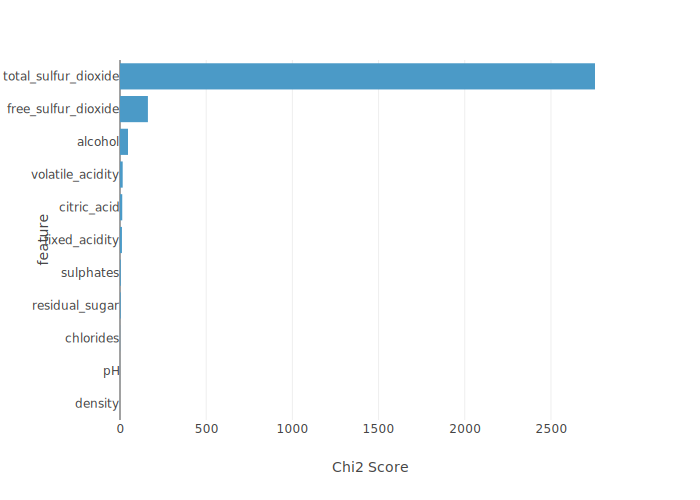

16. Try fitting the same model using the argument class_weight="balanced", what are the consequences on all the aspects of the performances studied before ?

accuracy score on training set :  0.4253322908522283
accuracy score on test set :  0.403125


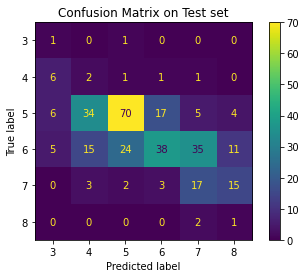

21. As an extra question for which no fixed solution will be proposed, attempt to improve the score using feature engineering (create new variables using common functions, combining variables together in a non-linear way etc...)